In [4]:

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import pathlib
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [5]:
data= pd.read_csv('C:/Users/charl/Downloads/Dry_Bean.csv', index_col=0)
data.head()

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
Area,,,,,,,,,,,,,,,,
28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724,SEKER
28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430,SEKER
29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066,SEKER
30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199,SEKER
30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166,SEKER


In [7]:
data.columns

Index(['Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation',
       'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity',
       'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'Class'],
      dtype='object')

In [8]:

data.isna().sum()

Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
Class              0
dtype: int64

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in data:
    data[i]=le.fit_transform(data[i])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
X=data.drop('Class',axis=1)
y=data.Class
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.25,random_state=0)
X

,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
Area,,,,,,,,,,,,,,,
28395,541,114,3086,580,580,787,788,7199,7839,12790,12966,10359,13430,12966,12252
28734,1108,41,4592,33,33,874,848,9738,2912,7084,13508,8824,13503,13508,11542
29380,788,181,3397,697,697,986,982,8934,9262,12301,12857,10030,13364,12857,12988
30008,1314,140,4545,212,212,1242,1129,9566,464,8786,13291,9020,13457,13291,3831
30140,722,50,6235,7,7,1163,1169,8287,11578,13530,13536,7139,13505,13536,13157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42097,5497,6279,5257,6844,6844,5008,4994,3058,10686,10103,6809,8143,7109,6809,11418
42101,5419,5810,6328,4516,4516,5000,4995,11801,11383,10631,9116,7074,8119,9116,11006
42139,5481,5806,6458,4381,4381,5035,5004,4211,9917,10299,9165,7028,8138,9165,7524


In [56]:
y

Area
28395    5
28734    5
29380    5
30008    5
30140    5
        ..
42097    3
42101    3
42139    3
42147    3
42159    3
Name: Class, Length: 13611, dtype: int64

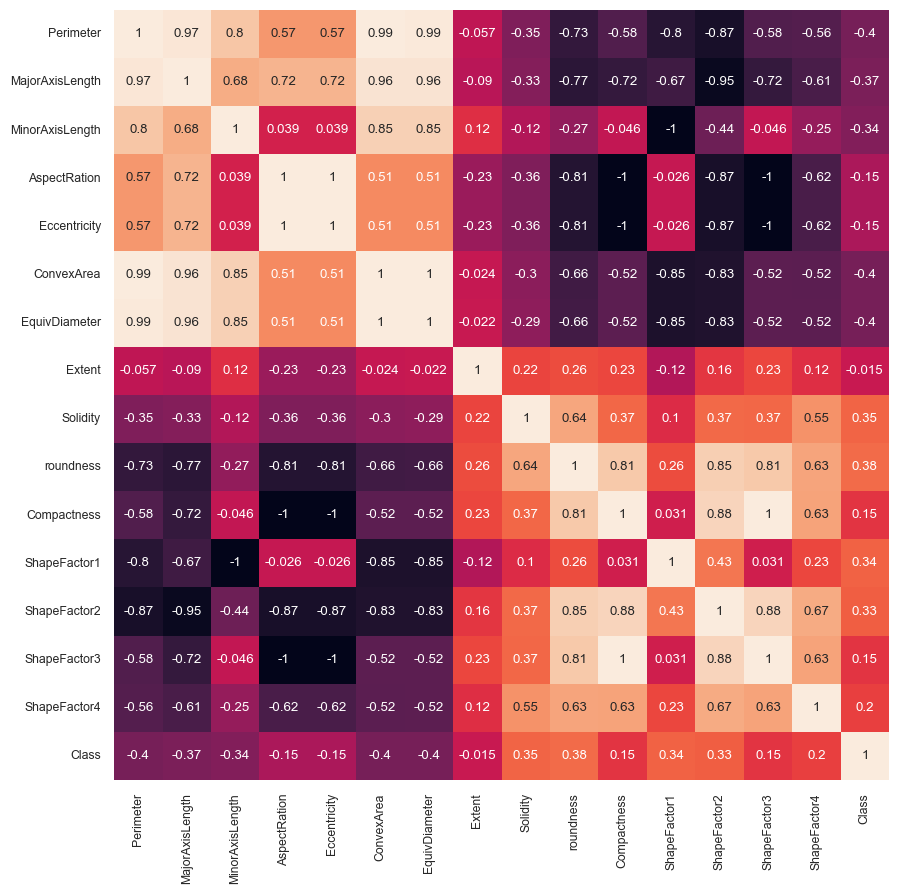

In [57]:
#상관 관계 행렬
data_corr=data.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(data_corr, annot=True, cbar=False)
plt.show()

In [58]:
data.shape


(13611, 16)

In [59]:
n_features = 1
X = data.iloc[:,1:16].values

In [60]:
#Splitting the data into training and test test
X = X.reshape((X.shape[0], X.shape[1], n_features))
Y = data.iloc[:,0].values

In [61]:
X

array([[[  114],
        [ 3086],
        [  580],
        ...,
        [12966],
        [12252],
        [    5]],

       [[   41],
        [ 4592],
        [   33],
        ...,
        [13508],
        [11542],
        [    5]],

       [[  181],
        [ 3397],
        [  697],
        ...,
        [12857],
        [12988],
        [    5]],

       ...,

       [[ 5806],
        [ 6458],
        [ 4381],
        ...,
        [ 9165],
        [ 7524],
        [    3]],

       [[ 5928],
        [ 6233],
        [ 4928],
        ...,
        [ 8563],
        [ 4947],
        [    3]],

       [[ 6691],
        [ 4496],
        [ 8608],
        ...,
        [ 5069],
        [10913],
        [    3]]], dtype=int64)

In [62]:
y

Area
28395    5
28734    5
29380    5
30008    5
30140    5
        ..
42097    3
42101    3
42139    3
42147    3
42159    3
Name: Class, Length: 13611, dtype: int64

In [63]:
y.shape

(13611,)

In [64]:
n_steps = X.shape[1]
n_steps

15

In [65]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.optimizers import SGD,Adam
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Input, Dense
from keras import models
from keras import layers

In [66]:
def build_model(): 
    model = models.Sequential()
    model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(n_steps, n_features)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(50, activation='relu'))
    model.add(Dense(50, activation='relu'))
    model.add(layers.Dense(1))
    #model.compile(optimizer='rmsprop', loss='mse', metrics=['mse'])
    model.compile(loss='mse', optimizer=Adam(lr=0.0062), metrics=['mse'])

    return model

model = build_model() 

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 14, 64)            192       
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 7, 64)            0         
 1D)                                                             
                                                                 
 flatten_4 (Flatten)         (None, 448)               0         
                                                                 
 dense_12 (Dense)            (None, 50)                22450     
                                                                 
 dense_13 (Dense)            (None, 50)                2550      
                                                                 
 dense_14 (Dense)            (None, 1)                 51        
                                                      

C:\Users\charl\anaconda3\lib\site-packages\keras\optimizers\legacy\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [67]:
model.fit(X_train, y_train, epochs=100, batch_size=120, verbose=0)
test_mse_score, test_mae_score = model.evaluate(X_test, y_test)

107/107 [==============================] - 0s 2ms/step - loss: 1.0180 - mse: 1.0180


In [71]:
#fitting the model and predicting 

# fit network(회귀)
model_history=model.fit(x=X_train, y=y_train, epochs=100, batch_size=16,validation_data= (X_test,y_test))
y_pred = model.predict(X_test)
y_test_class = np.argmax(y_test, axis=0)
y_pred_class = np.argmax(y_pred, axis=0)

'''
y_test_class = np.argmax(y_test.values, axis=1)
y_pred_class = np.argmax(y_pred,axis=1)

'''

#분류
'''
model.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0062), metrics=['accuracy'])
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

y_test_class = np.argmax(y_test.values, axis=1)
y_pred_class = np.argmax(y_pred, axis=1)
'''

Epoch 1/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3613 - mse: 3.3613 - val_loss: 3.3031 - val_mse: 3.3031
Epoch 2/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3629 - mse: 3.3629 - val_loss: 3.3037 - val_mse: 3.3037
Epoch 3/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3610 - mse: 3.3610 - val_loss: 3.3079 - val_mse: 3.3079
Epoch 4/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3621 - mse: 3.3621 - val_loss: 3.3028 - val_mse: 3.3028
Epoch 5/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3610 - mse: 3.3610 - val_loss: 3.3142 - val_mse: 3.3142
Epoch 6/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3619 - mse: 3.3619 - val_loss: 3.3079 - val_mse: 3.3079
Epoch 7/100
638/638 [==============================] - 1s 2ms/step - loss: 3.3617 - mse: 3.3617 - val_loss: 3.3045 - val_mse: 3.3045
Epoch 8/100
638/638 [==============================] - 1s 2ms/step - 

"\nmodel.compile(loss='categorical_crossentropy', optimizer=Adam(lr=0.0062), metrics=['accuracy'])\nmodel.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))\ny_pred = model.predict(X_test)\n\ny_test_class = np.argmax(y_test.values, axis=1)\ny_pred_class = np.argmax(y_pred, axis=1)\n"

In [72]:
y_test

Area
37277     3
28942     3
38290     3
37641     6
50172     5
         ..
46731     6
35720     5
26653     3
27797     3
140867    1
Name: Class, Length: 3403, dtype: int64

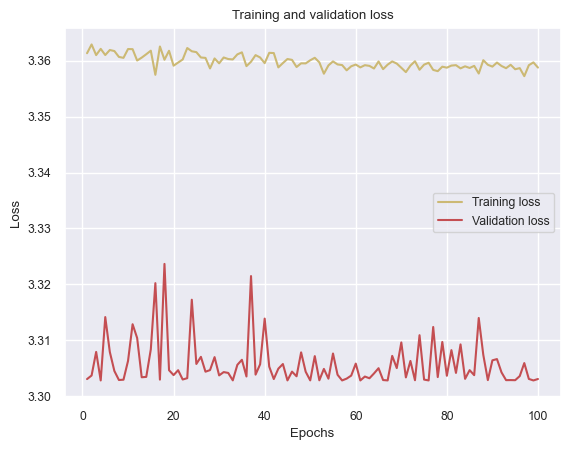

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

loss =model_history.history['loss']
val_loss =model_history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()